# Wisconsin Breast Cancer dataset

In [216]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Sklearn classifiers
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Sklearn Postprocessing
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

## Introduction

Brest cancer is the second leading cause of death among women. Breast cancer considered the most common invasive cancer in women, with more than one million cases and nearly 600,000 deaths occurring worldwide annually. The Breast Cancer Wisconsin (Diagnostic) Data Set has been used in data science for classification tasks since 1992. This dataset was created to aid research to classify malignant or benign growths. The dataset gives 10 variables decribing the growths along with the Diagnosis if this growth was benign or malignant.

Part of the difficulty in developing a technique for classifying the growths comes from the fact there is no one observable variable that could confirm if the growth is malignant or benign. There should instead be a combination of variable that together can give an indication either way. Not all vairables are of equal importance, some variables might be highly correlated with the state of the growth and others may be weakly correlated. The challange in developing and deploying an accurate classifying model is finding these highly correlated varibales.

### literature review

To examine previous training and classification methods used on this dataset, a literature review has been carried out. An important paper published on this topic is "Breast Cancer Diagnosis on Three Different Datasets Using Multi-Classifiers".

The classifiers used in ths paper are:
- Naive Bayes (NB). This is a probabilistic classifier based on Bayes theorem.Ths uses strong independence assumptions between the features. This is available in sklearn.
- The Multilayer Perceptron (MLP). This is a feedforward artificial neural network. This is available in sklearn.
- Support Vector Machine (SVM) or (SMO). SVMs are one of the most robust prediction methods, being based on statistical learning frameworks or VC theory. This is available in sklearn.
- K-Nearest Neighbor (KNN) or (IBK). This is a non-parametric supervised learning method which can be used for classification or regression. This is available in sklearn.
- Decision tree J48. The C4.5 algorithm is a classification algorithm which produces decision trees based on information theory. This is available in sklearn.

Performace of classifiers:
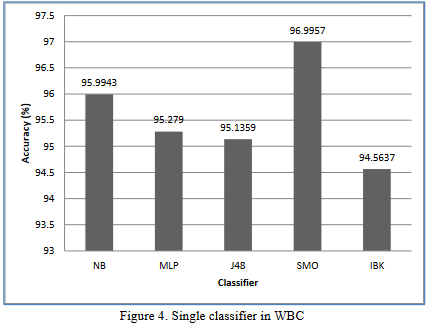
Reference: 3. Plot take from paper: "Breast Cancer Diagnosis on Three Different Datasets Using Multi-Classifiers."

A review of the above plot, all 5 classifiers have an accuracy above 94%, with confidence we can say that each of these classifiers are better than guessing. There is merit in using each of these. The lowest performing classifier is the k-Nearest Neighbor at 94%. The Decision tree J48 is the next best classifier at 95%. The Multilayer Perceptron is the 3rd best classifier, this method uses an artifical neural network to achieve 95.3%. At close to 96% accuracy, the Naive Bayes classifier using a kernel density estimation makes an improvement in accuracy. The highest performing classifier is the SMO classifier, this achieves close to 97% accuracy using a Support Vector Machine.

This paper goes on to show additional accuracy can be gaind by implementing multiple classification methods into the one classification exercise. A combination of: SMO, IBK, NB and J48 achieves the highest accuracy of 97.3%. However this will be beyond the scope of this study.

### Statistical analysis of the dataset.

#### Loading the dataset

In [217]:
# Loading data from CSV file
data = pd.read_csv('Data\data.csv')

In [218]:
# Having a look at the data
data.head(10)

#####Attribute Information:
#1) ID number
#2) Diagnosis (M = malignant, B = benign)

#Ten real-valued features are computed for each cell nucleus:
#a) radius (mean of distances from center to points on the perimeter)
#b) texture (standard deviation of gray-scale values)
#c) perimeter
#d) area
#e) smoothness (local variation in radius lengths)
#f) compactness (perimeter^2 / area - 1.0)
#g) concavity (severity of concave portions of the contour)
#h) concave points (number of concave portions of the contour)
#i) symmetry
#j) fractal dimension ("coastline approximation" - 1)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010              0.14710   
1          0.08474           0.07864         0.08690              0.07017   
2          0.10960           0.15990         0.19740              0.12790   
3          0.14250           0.28390         0.24140              0.10520   
4          0.10030           0.13280         0.19800              0.10430   
5          0.12780           0.17000         0.15780              0.08089   
6          0.09463           0.10900         0.11270              0.07400   
7          0.11890           0.16450         0.09366              0.05985   
8          0.12730           0.19320         0.18590              0.09353   
9          0.11860           0.23960         0.22730              0.08543   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   
5  ...          23.75           103.40       741.6            0.1791   
6  ...          27.66           153.20      1606.0            0.1442   
7  ...          28.14           110.60       897.0            0.1654   
8  ...          30.73           106.20       739.3            0.1703   
9  ...          40.68            97.65       711.4            0.1853   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   
5             0.5249           0.5355                0.1741          0.3985   
6             0.2576           0.3784                0.1932          0.3063   
7             0.3682           0.2678                0.1556          0.3196   
8             0.5401           0.5390                0.2060          0.4378   
9             1.0580           1.1050                0.2210          0.4366   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  
5                  0.12440          NaN  
6                  0.08368          NaN  
7                  0.11510          NaN  
8                  0.10720          NaN  
9                  0.20750          NaN  

[10 rows x 33 columns]

In [219]:
# Checking shape
data.shape

(569, 33)

#### Cleaning data

Looking at the split of the diagnosis in the dataset.

In [220]:
# Changing the diagnosis column to a binary 0 or 1
# 1 = Malignant
# 0 = Benign
data['diagnosis'] = data['diagnosis'].map({'M' : 1, 'B' : 0})
print("Malignant occurances (cancerous) : {}".format(data["diagnosis"].value_counts()[1]))
print("Benign occurances (noncancerous) : {}".format(data["diagnosis"].value_counts()[0]))

data.head(5)

Malignant occurances (cancerous) : 212
Benign occurances (noncancerous) : 357


id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [221]:
# dropping the last empty column
data = data.drop('Unnamed: 32', axis=1)

In [222]:
# Splitting the data into a training set and a test set
data_train, data_test= train_test_split(data,test_size=0.3, random_state=0)

In [223]:
# Checking shape of the training and test features
data_train.shape, data_test.shape

((398, 32), (171, 32))

### Checking correlation of training features

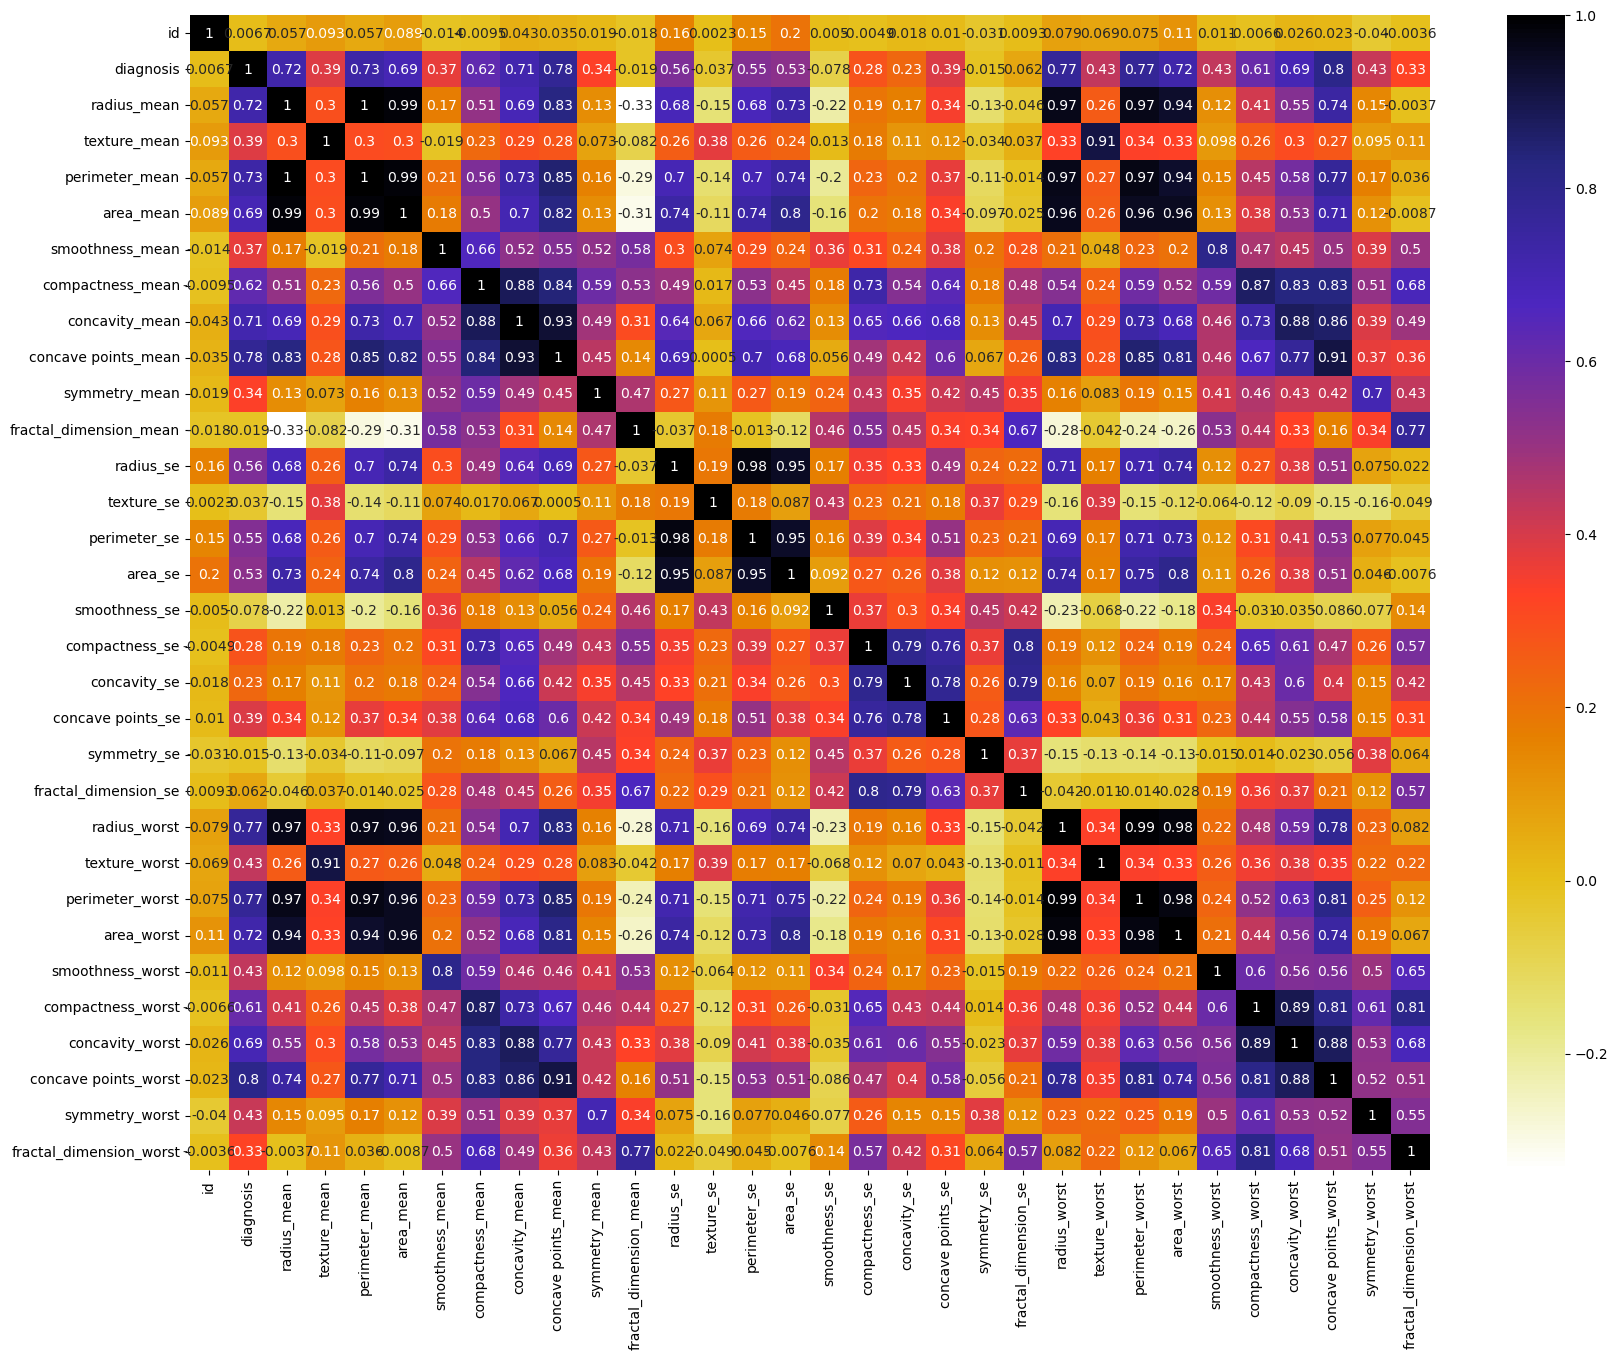

In [224]:
plt.figure(figsize=(20,15))
data_train['diagnosis']=data_train['diagnosis'].astype('category').cat.codes
cor = data_train.corr(numeric_only=False)
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

### Select the highly correlated features

In [225]:
# Correlation feature extraction Ref: 10
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [226]:
# Selecting all columns with a correlation of 0.6 and higher
corr_features = correlation(data_train, 0.6)

In [227]:
len(set(corr_features))
print('correlated features: ', len(set(corr_features)))

correlated features:  23


In [228]:
# Checking which columns were selected as highly correlated
print('correlated features are: ', corr_features )

correlated features are:  {'concave points_worst', 'radius_se', 'area_mean', 'area_worst', 'compactness_mean', 'concavity_se', 'fractal_dimension_worst', 'smoothness_worst', 'area_se', 'concavity_worst', 'perimeter_mean', 'concavity_mean', 'perimeter_worst', 'compactness_se', 'texture_worst', 'fractal_dimension_se', 'symmetry_worst', 'radius_mean', 'radius_worst', 'compactness_worst', 'concave points_se', 'perimeter_se', 'concave points_mean'}


#### Setting up the training features

In [229]:
target_name = 'diagnosis'

# Separate object for target feature
y_train = data_train[target_name]
y_test = data_test[target_name]

# Separate object for input features
x_train = data_train[corr_features]
x_test = data_test[corr_features]

In [230]:
# Checking shape
x_train.shape

(398, 23)

## Visual analysis

### Means

In [231]:
# seperating only the means into a dataset
means = data_train.iloc[:, 1 : 12]

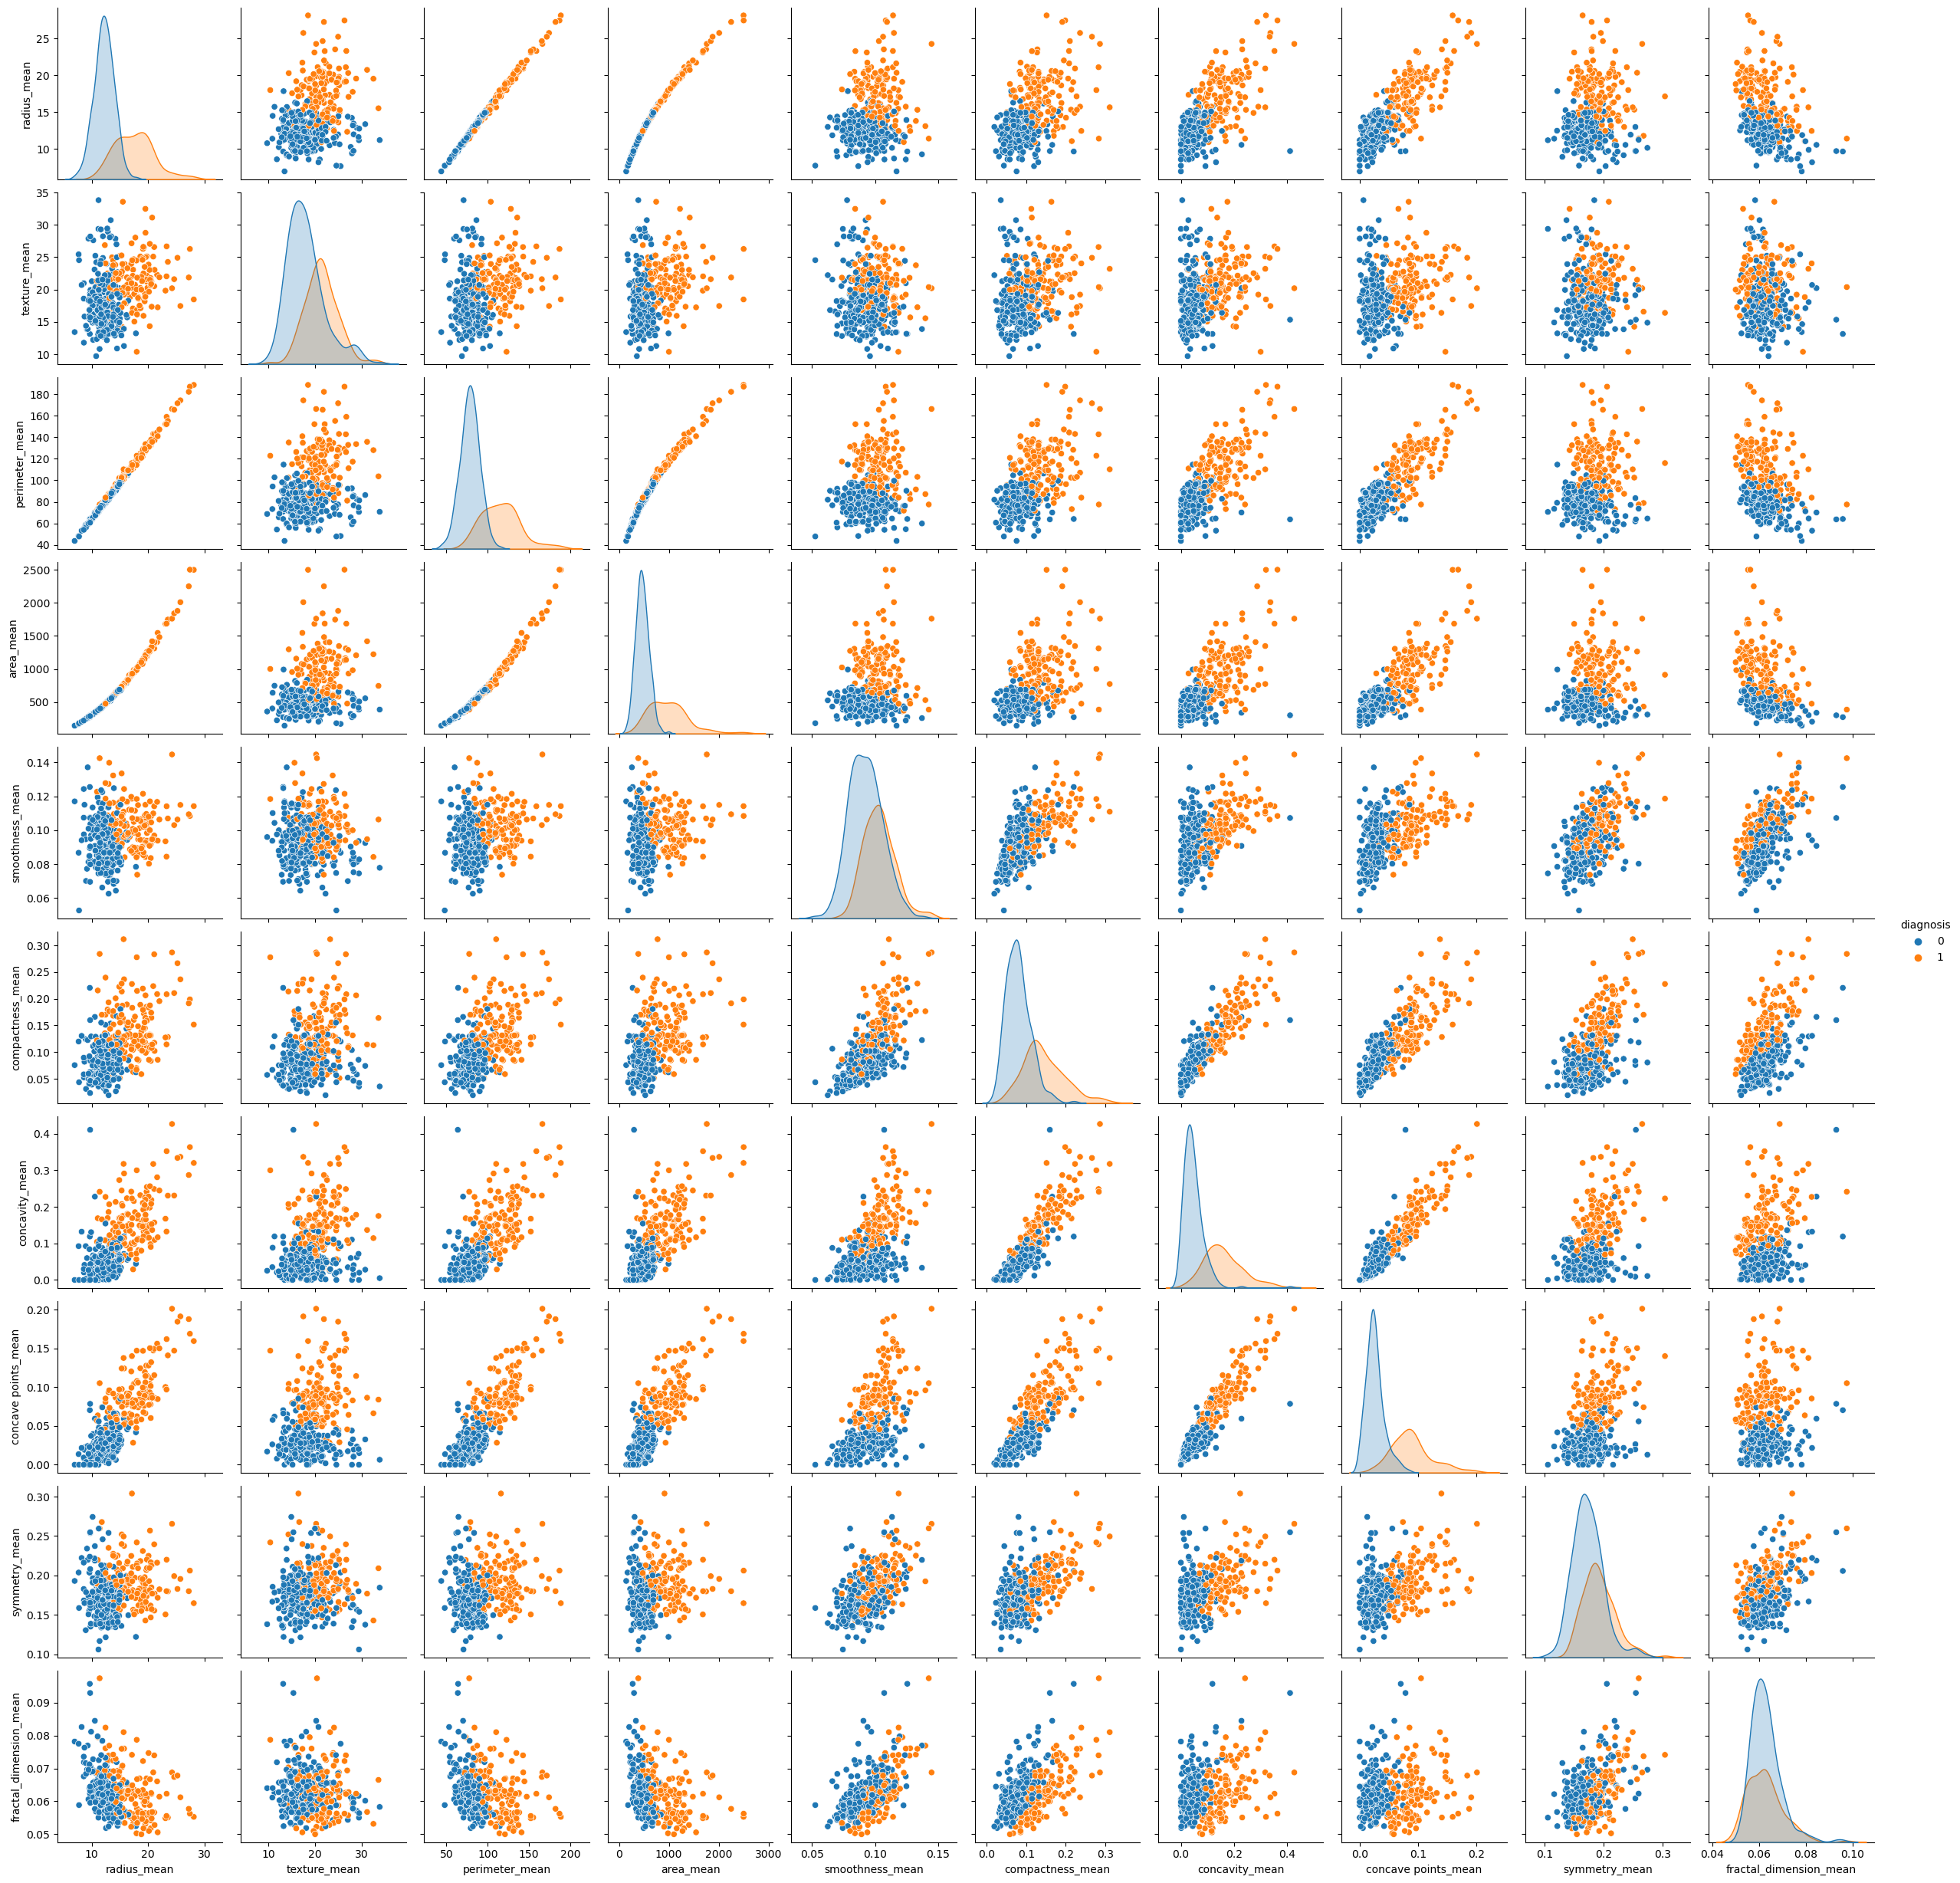

In [232]:
# Plotting all the means on a pairplot, coloured based off diagnosis
sns.pairplot(means, hue = 'diagnosis')
plt.show()

#### Selected features from above plot

- radius_mean
- perimeter_mean
- area_mean
- compactness_mean
- concavity_mean
- concave points_mean

#### Looking at the data in the diagonal for each variable in isolation. 

- Radius_Mean, we can see there is some overlap in radius size between the Malignant and Benign data, however there is a large range from 20 and greater where only Malignant growths were observed, giving some usefull data here.
- Texture mean, There is a strong overlap here in the data, this variable may not be very useful in classifying the growths. However the two sets of data peak at a different mean showing there are differences here.
- Perimeter_mean, it can be expected that there is a strong corrilation here with the raduis_mean, this data also shows a large range where there is no overlap in data for values greater than 130. The Benign growths have less variance in perimeter size compared to the Malignant growths.
- Area-Mean, this plot appears very simular to the Perimeter_mean.
- Smoothness_mean, there is a a large overlap here in the data, both plots appear to peak at very simular means of 0.1. This may not be a usefull variable for diagnosis
- Compactness_mean, very simular to the smoothness_mean, however there is more variance in the Malignant data here.
- Concavity_mean, there is a noticable difference here between the mean of the Malignant data and the Benign data. There is much more variance in the Malignant data, while the Benign data is very focused in the lower end of the plot.
- Concave point_mean, This plot is very simular to the Concavity_mean.
- Symmetry_mean, There is a large overlap in the data here and both Malignant and Benign data appears to have the same variance

Other interesting plots: 
- Radius_mean VS Perimeter_mean; the result of the combination of these variables forms a line, where Malignant growths gather at the top right and Benign growths gather at the bottom left. There is very little varance from this line.

### Standard Deviations

In [233]:
# Seperating the SE's into its own dataset, and adding back in the diagnosis column
se = data_train.iloc[:, 12 : 22]
se.insert(column = 'diagnosis', loc = int(len(se.columns)), value = data['diagnosis'])

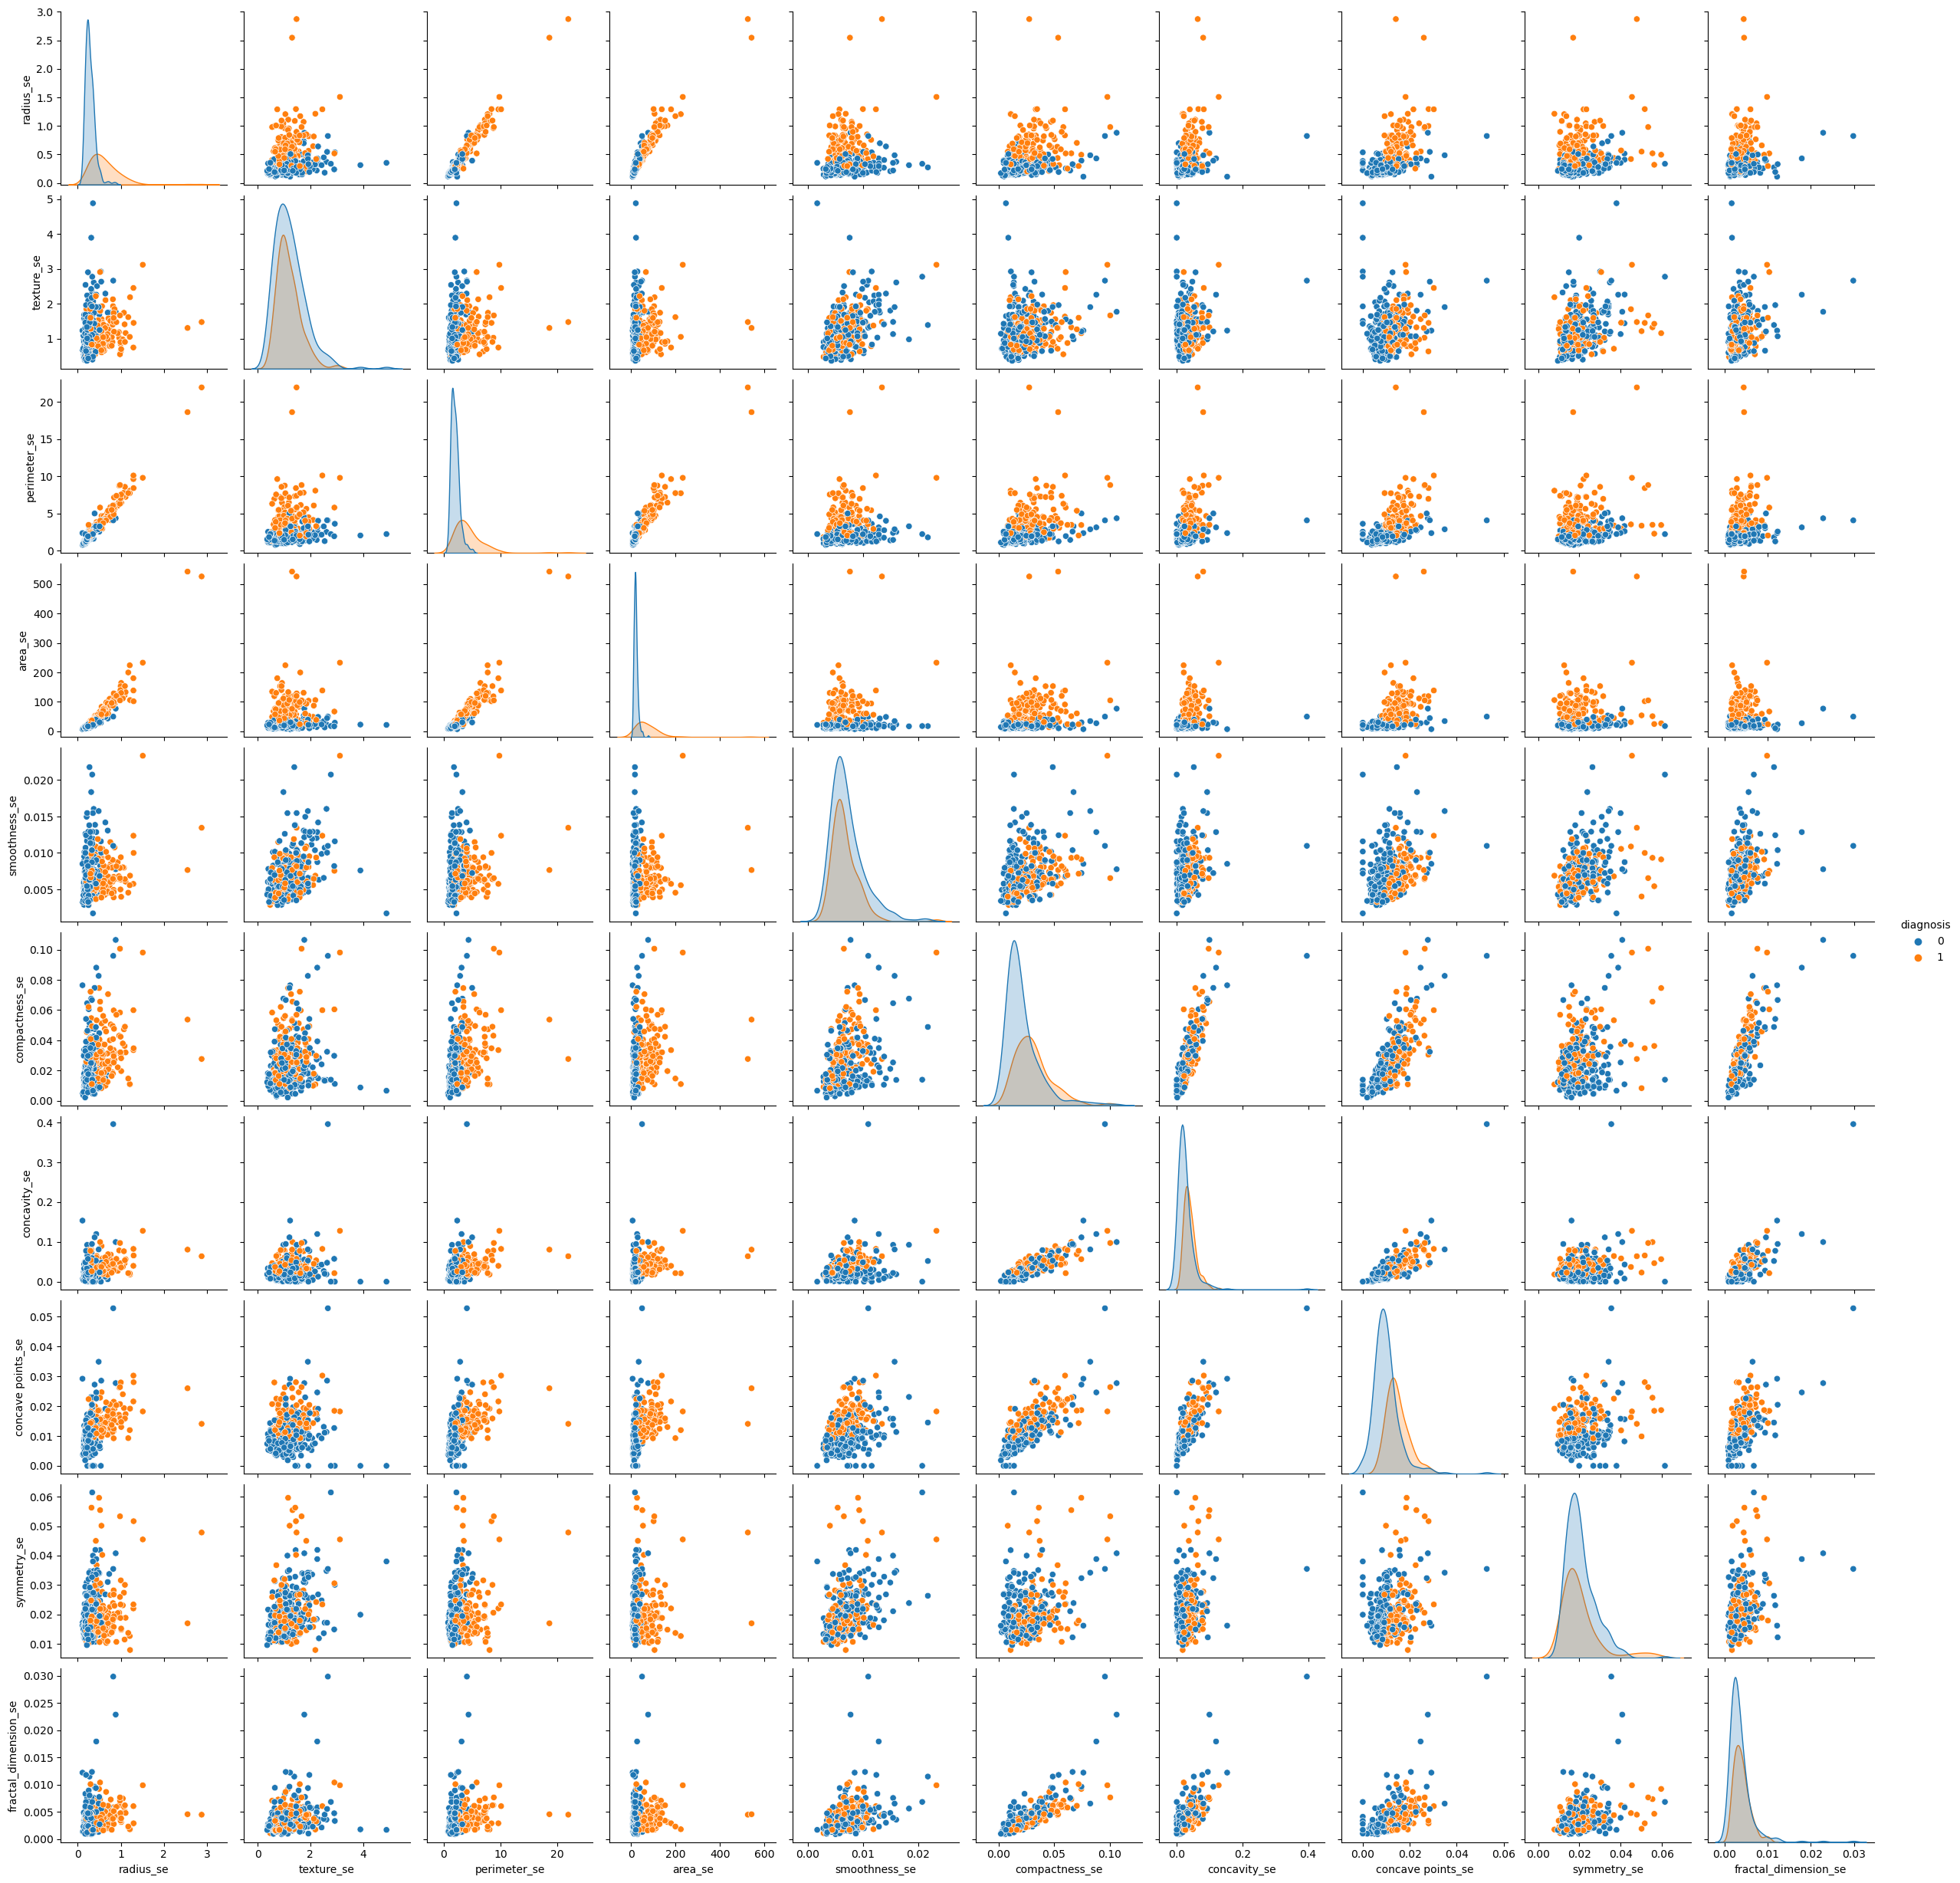

In [234]:
# Pairplot of the SE's, coloured based off diagnosis
sns.pairplot(se, hue = 'diagnosis')
plt.show()

#### Selected features from above plot

- radius_se
- perimeter_se
- area_se
- compactness_se
- concavity_se
- concave points_se
- fractal_dimension_se

### Worst

In [235]:
# Seperating Worst into its own dataset and adding back in diagnosis
worst = data_train.iloc[:, 22 : 32]
worst.insert(column = 'diagnosis', loc = int(len(worst.columns)), value = data['diagnosis'])

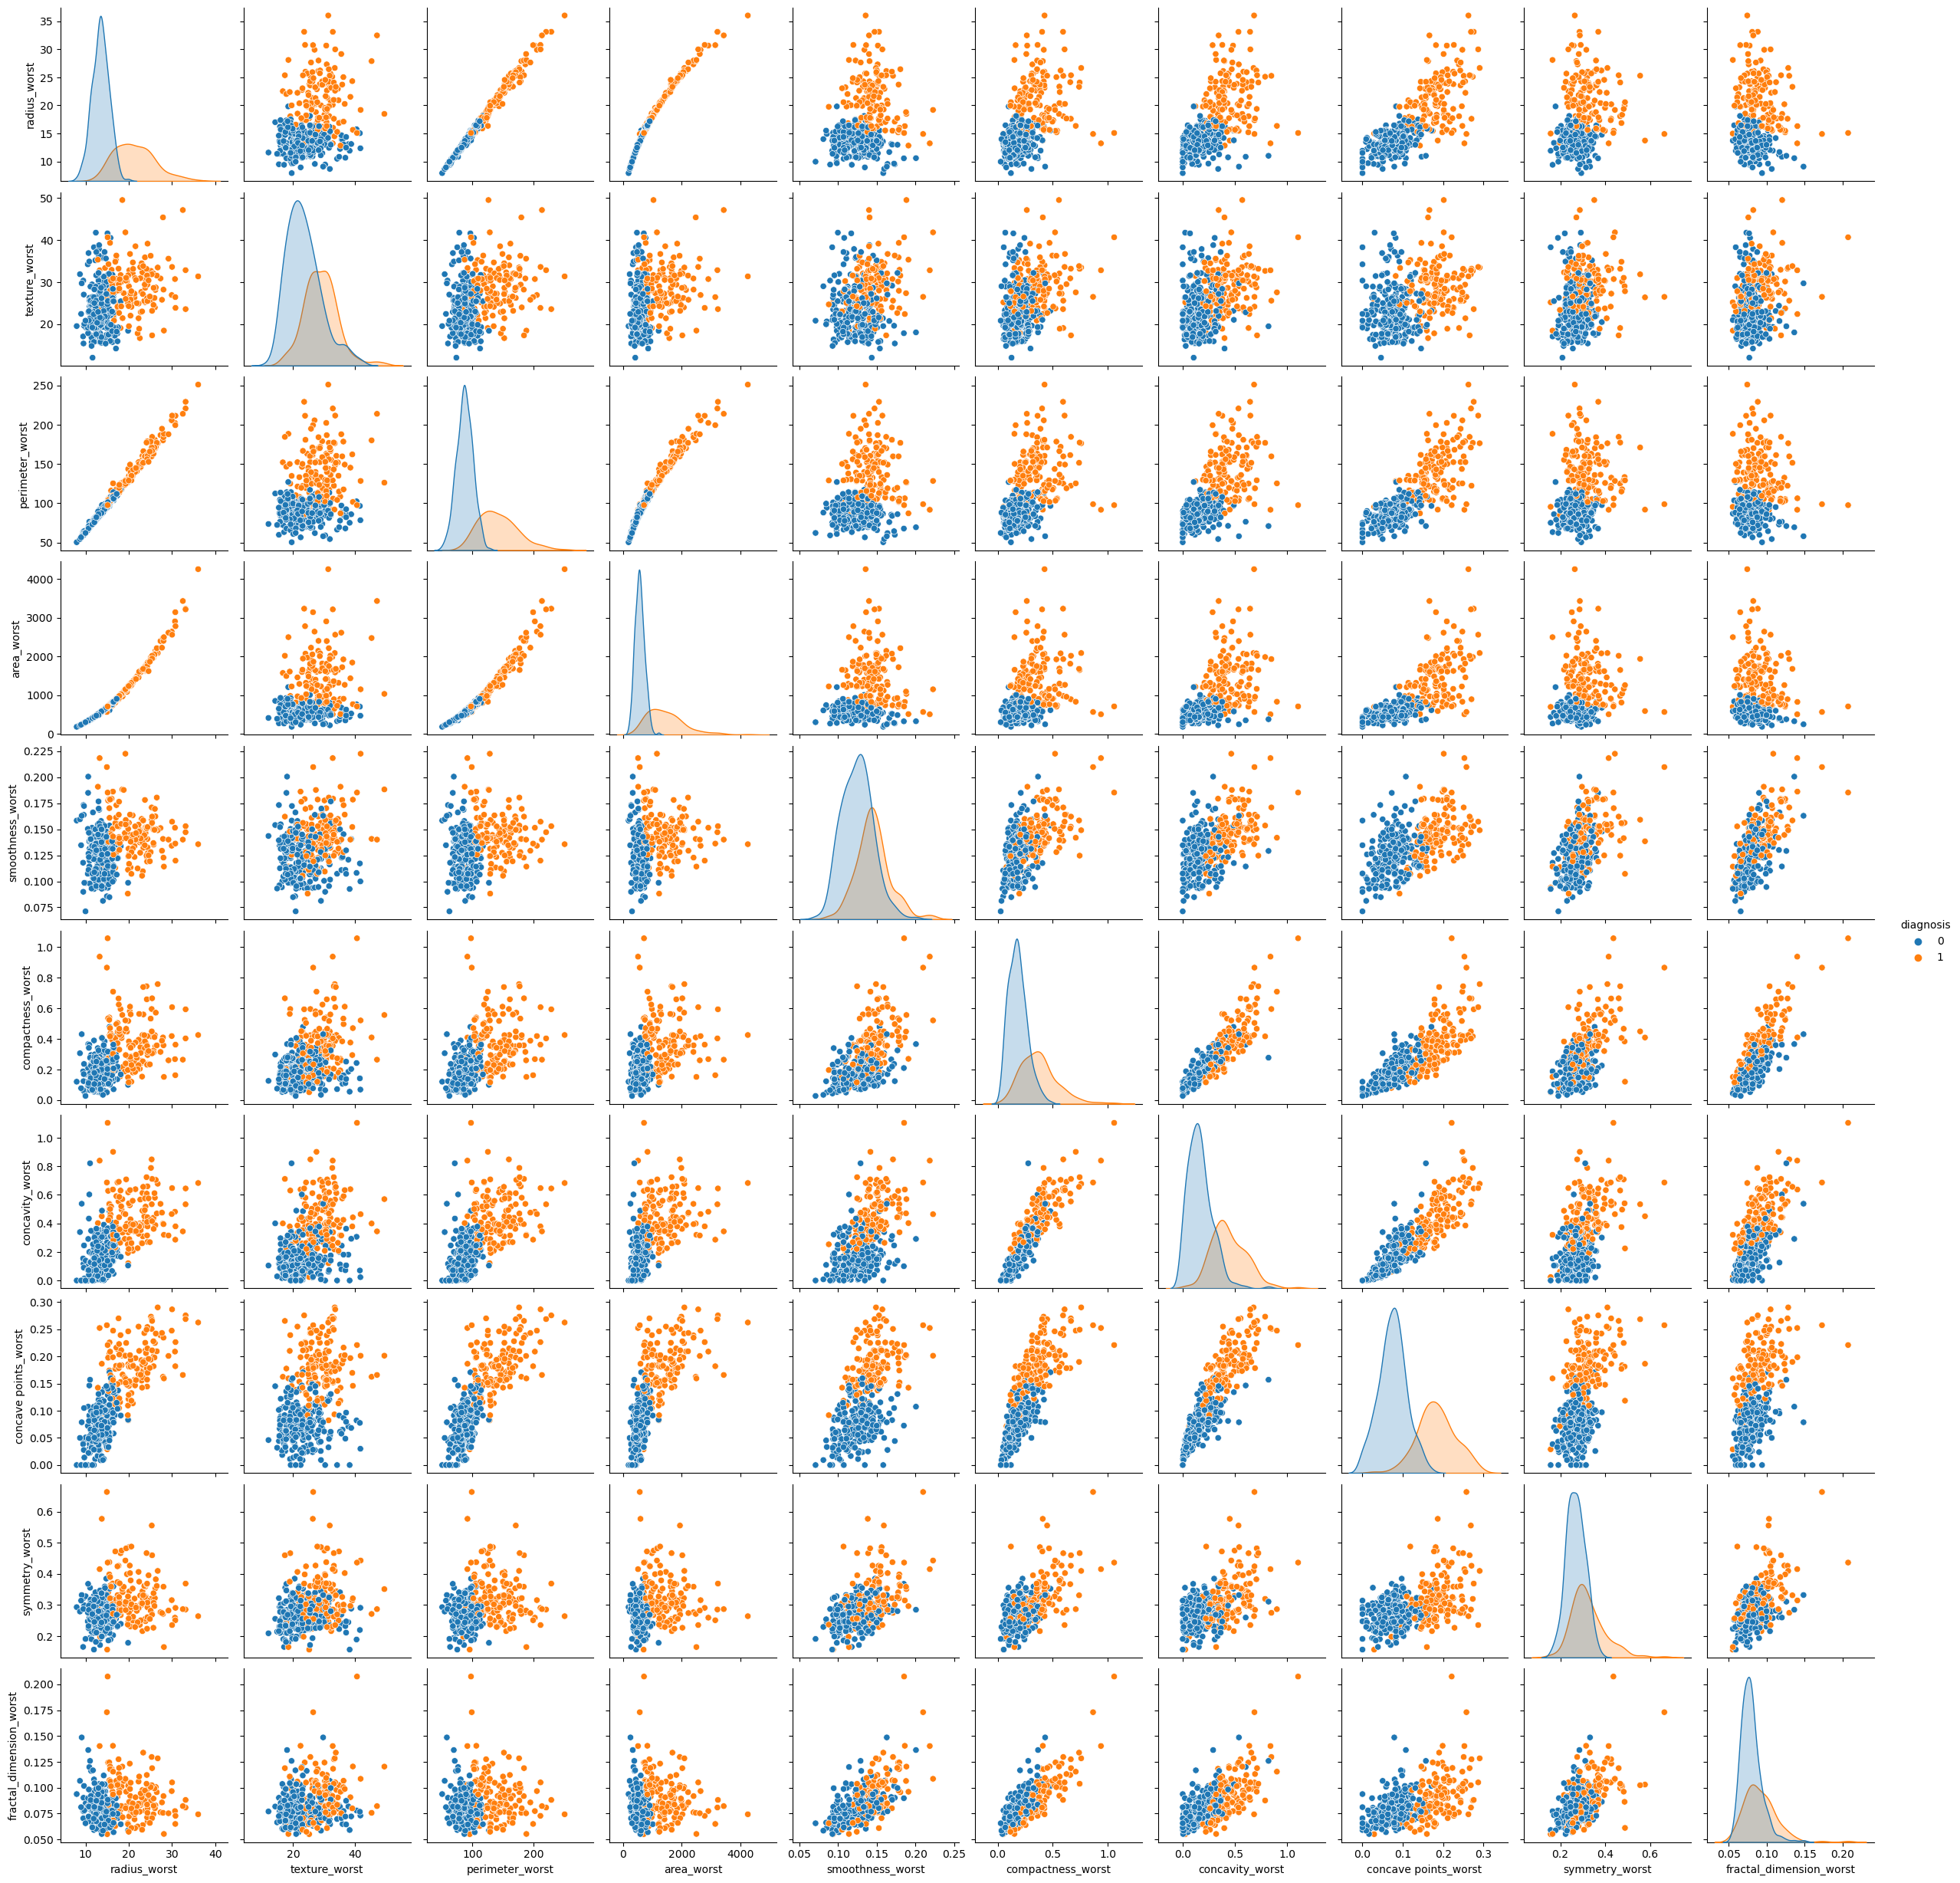

In [236]:
# Pairplot of worst values, coloured based off diagnosis
sns.pairplot(worst, hue = 'diagnosis')
plt.show()

#### Selected features from above plot

- radius_worst
- texture_worst
- perimeter_worst
- area_worst
- smoothness_worst
- compactness_worst
- concavity_worst
- concave points_worst
- symmetry_worst
- fractal_dimension_worst

All of the above features were selected as highly correlated

In total 23 variables accross the 32 total were selected as important for the training of these models.

## Classifiers

### MLP Classifier

Tuning the MLP Classifier

In [237]:
# setting up a grid search to tune an MLP Classifier
model = MLPClassifier(random_state=0)

# Testing the Max iter and the Hidden Layer size
parameters = {'max_iter' : (100, 200, 400, 800, 1600), 'hidden_layer_sizes' : (100, 150, 200, 250, 300)}

In [238]:
# Perfroming grid search using the above lists
best_model = GridSearchCV(model, parameters)

In [239]:
# Fitting models using this grid search
best_model.fit(x_train, y_train)

GridSearchCV(estimator=MLPClassifier(random_state=0),
             param_grid={'hidden_layer_sizes': (100, 150, 200, 250, 300),
                         'max_iter': (100, 200, 400, 800, 1600)})

In [240]:
# Selecting the best parameters from the gridsearch
best_model.best_params_

{'hidden_layer_sizes': 200, 'max_iter': 200}

Testing MLP Classifier

In [241]:
# Loading an MLP Classifier. 
# Using the best values from above
model = MLPClassifier(max_iter=200, hidden_layer_sizes=200, random_state=0)

# Fiting a model to the training data
model.fit(x_train, y_train)

# Using the trained model to make predictions on the test data
predictionsMLP = model.predict(x_test)

# Comparing the predictions to the known answers
confusion_matrix(y_test, predictionsMLP)

array([[104,   4],
       [  4,  59]], dtype=int64)

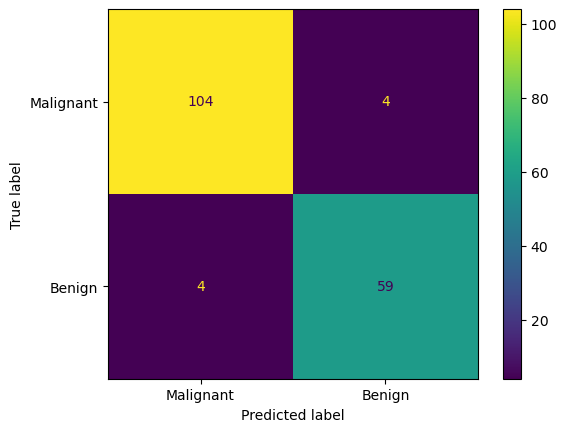

In [242]:
# Plotting the confusion matrix Ref 11.
cm = confusion_matrix(y_test, predictionsMLP, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Malignant',  'Benign'])
disp.plot()

plt.show()

In [243]:
precisionMLP = precision_score(y_test, predictionsMLP)
print("The precision is %.3f" % precisionMLP)

recallMLP = recall_score(y_test, predictionsMLP)
print("The recall is %.3f" % recallMLP)

accuracyMLP = accuracy_score(y_test, predictionsMLP)
print("The accuracy is %.3f" % accuracyMLP)

The precision is 0.937
The recall is 0.937
The accuracy is 0.953


### SVC Classifier

Testing MLP Classifier

In [244]:
# Trying a SVC model
model = SVC(random_state=0)

# Fiting a model to the training data
model.fit(x_train, y_train)

# Using the trained model to make predictions on the test data
predictionsSVC = model.predict(x_test)

# Comparing the predictions to the known answers
confusion_matrix(y_test, predictionsSVC)

array([[107,   1],
       [ 12,  51]], dtype=int64)

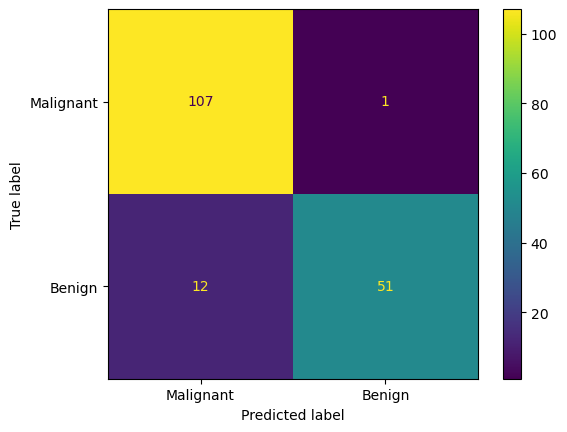

In [245]:
# Plotting the confusion matrix
cm = confusion_matrix(y_test, predictionsSVC, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Malignant',  'Benign'])
disp.plot()

plt.show()

In [246]:
precisionSVC = precision_score(y_test, predictionsSVC)
print("The precision is %.3f" % precisionSVC)

recallSVC = recall_score(y_test, predictionsSVC)
print("The recall is %.3f" % recallSVC)

accuracySVC = accuracy_score(y_test, predictionsSVC)
print("The accuracy is %.3f" % accuracySVC)

The precision is 0.981
The recall is 0.810
The accuracy is 0.924


### KNeighborsClassifier

Tuning KNN Classifier

In [250]:
# setting up a grid search to tune an MLP Classifier
model = KNeighborsClassifier()

# Testing the Max iter and the Hidden Layer size
parameters = {'n_neighbors' : (3, 4, 5, 6, 7)}

In [251]:
# Perfroming grid search using the above lists
best_model = GridSearchCV(model, parameters)

In [252]:
# Fitting models using this grid search
best_model.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': (3, 4, 5, 6, 7)})

In [253]:
# Selecting the best parameters from the gridsearch
best_model.best_params_

{'n_neighbors': 7}

Running KNN Classifier with best parameter

In [256]:
# Trying a KNeighborsClassifier model
model = KNeighborsClassifier(n_neighbors=7)

# Fiting a model to the training data
model.fit(x_train, y_train)

# Using the trained model to make predictions on the test data
predictionsKNN = model.predict(x_test)

# Comparing the predictions to the known answers
confusion_matrix(y_test, predictionsKNN)

array([[104,   4],
       [  4,  59]], dtype=int64)

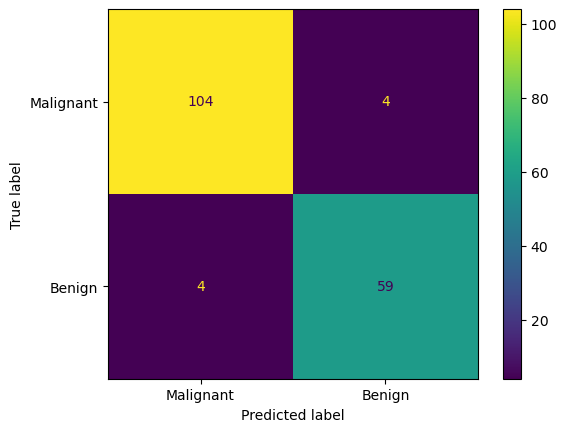

In [257]:
# Plotting the confusion matrix
cm = confusion_matrix(y_test, predictionsKNN, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Malignant',  'Benign'])
disp.plot()

plt.show()

In [258]:
precisionKNN = precision_score(y_test, predictionsKNN)
print("The precision is %.3f" % precisionKNN)

recallKNN = recall_score(y_test, predictionsKNN)
print("The recall is %.3f" % recallKNN)

accuracyKNN = accuracy_score(y_test, predictionsKNN)
print("The accuracy is %.3f" % accuracyKNN)

The precision is 0.937
The recall is 0.937
The accuracy is 0.953


## Results

The best performing model of the 3 was the MLP calssifier, the second best was the KNeighborsClassifier, and the worst performing wass the SVC Classifier.

The 3 models used above all underperformed when comparing against models used in literature. All of my models will be compared against "Breast Cancer Diagnosis on Three Different Datasets Using Multi-Classifiers" Ref: 3.

### MLP Classifier
In this paper they achieve an MLP classifer that has 95.3% accuracy. The model built and trained above did not achive this same level of accuracy, it achieved 92.9%. This could potentially have been caused by the choice of variables used to train the model. To explore this a futher study could be done with additional testing all combinations of variables.

### SVC Classifier (SMO)
The model trained above achieved an accuracy of 85.9%. This was the lowest performing model of the three tested by around 5%. This was not expected when comparing with literature, as this achieved the highest accuracy of 97% in literature. There is clearly room for improvement here. Again due to the trend of underperforming models, this could be due to variable section when training.

### KNeighborsClassifier
This model achieved an accuracy of  90.3%. Comparing this to literature, the highest accuracy achieved was 94.5%




## References:

Feature Selection and Data Visualization, Python · Breast Cancer Wisconsin (Diagnostic) Data Set: https://www.kaggle.com/code/kanncaa1/feature-selection-and-data-visualization

Basic Machine Learning with Cancer, Python · Breast Cancer Wisconsin (Diagnostic) Data Set: https://www.kaggle.com/code/gargmanish/basic-machine-learning-with-cancer

Breast Cancer Diagnosis on Three Different Datasets Using Multi-Classifiers. By:Gouda I. Salama, M.B.Abdelhalim, and Magdy Abd-elghany Zeid. International Journal of Computer and Information Technology (2277 – 0764) Volume 01– Issue 01, September 2012. https://www.academia.edu/download/86542259/Paper010105.pdf

Naive Bayes classifier https://en.wikipedia.org/wiki/Naive_Bayes_classifier

Multilayer perceptron https://en.wikipedia.org/wiki/Multilayer_perceptron

Support vector machine https://en.wikipedia.org/wiki/Support_vector_machine

k-nearest neighbors algorithm https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

J48 Classification (C4.5 Algorithm) in a Nutshell https://medium.com/@nilimakhanna1/j48-classification-c4-5-algorithm-in-a-nutshell-24c50d20658e

How to Count Occurrences of Specific Value in Pandas Column?: https://www.geeksforgeeks.org/how-to-count-occurrences-of-specific-value-in-pandas-column/

Ref: 10, correlated feature extraction: https://youtu.be/ZGbXSVZjES4?t=416

Ref: 11, Confusion matrix plot: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html